In [48]:
import time
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import pandas as pd
import calendar
from collections import Counter
import datetime

os.chdir("/Users/lucasvilsen/Desktop/GrammatikTAK/")

In [64]:
data = json.load(open("BackendAssistants/data_review_site/datastore/Backend-alltext.json"))
timestamps = [data[i]["time"] for i in range(len(data))]
true_timestamps = [timestamp for timestamp in timestamps if timestamp != "unknown"]
true_timestamps

['2023-05-21 21:00:33',
 '2023-05-29 19:00:33',
 '2023-05-29 21:00:33',
 '2023-05-30 21:00:33']

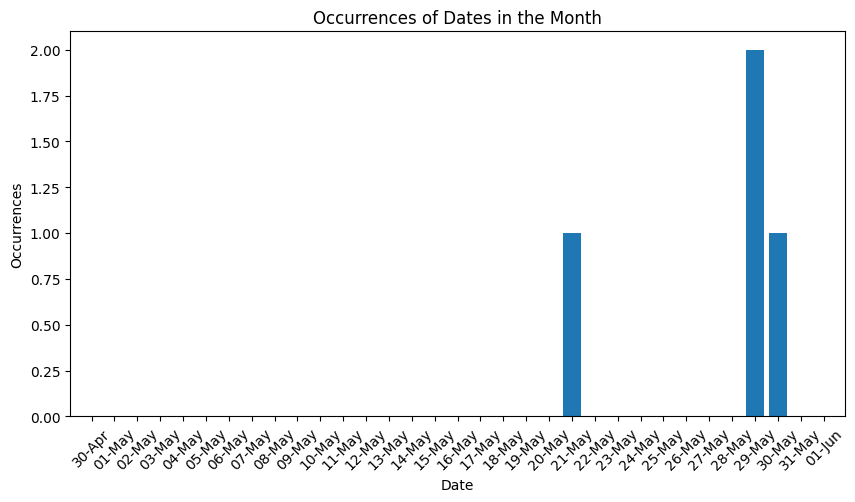

In [68]:
date_objects = [datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S").date() for date in true_timestamps]

start_date = min(date_objects).replace(day=1)
end_date = max(date_objects).replace(day=calendar.monthrange(max(date_objects).year, max(date_objects).month)[1])
all_dates = pd.date_range(start=start_date, end=end_date, freq='D')

date_counts = [date_objects.count(date.date()) for date in all_dates]

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(all_dates, date_counts)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Occurrences')
plt.title('Occurrences of Dates in the Month')

plt.show()
